In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 8.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
all_files = glob.glob('myCabinetExcelData*xls')
all_files

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [12]:
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [13]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index= True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [14]:
all_years = all_files_data_concat['출판일']

0      2015
1      2016
2      2016
3      2018
4      2017
       ... 
995    2017
996    2017
997    2016
998    2018
999    2016
Name: 출판일, Length: 1000, dtype: int64

In [11]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index = False)

In [3]:
all_files_data_concat = pd.read_csv("riss_bigdata.csv")
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [4]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [5]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop =  [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [16]:
word_counts = Counter(words2)
top_word_counts = dict(sorted(Counter(all_years).items(), key=lambda item: item[1], reverse=True)[:30])

In [17]:
top_word_counts

{2017: 158,
 2014: 154,
 2016: 139,
 2018: 130,
 2015: 114,
 2019: 106,
 2013: 87,
 2020: 43,
 2012: 34,
 2011: 8,
 2002: 4,
 2004: 3,
 2010: 3,
 2008: 3,
 2005: 3,
 1998: 3,
 2009: 2,
 2007: 2,
 1996: 1,
 2003: 1,
 1994: 1,
 1995: 1}

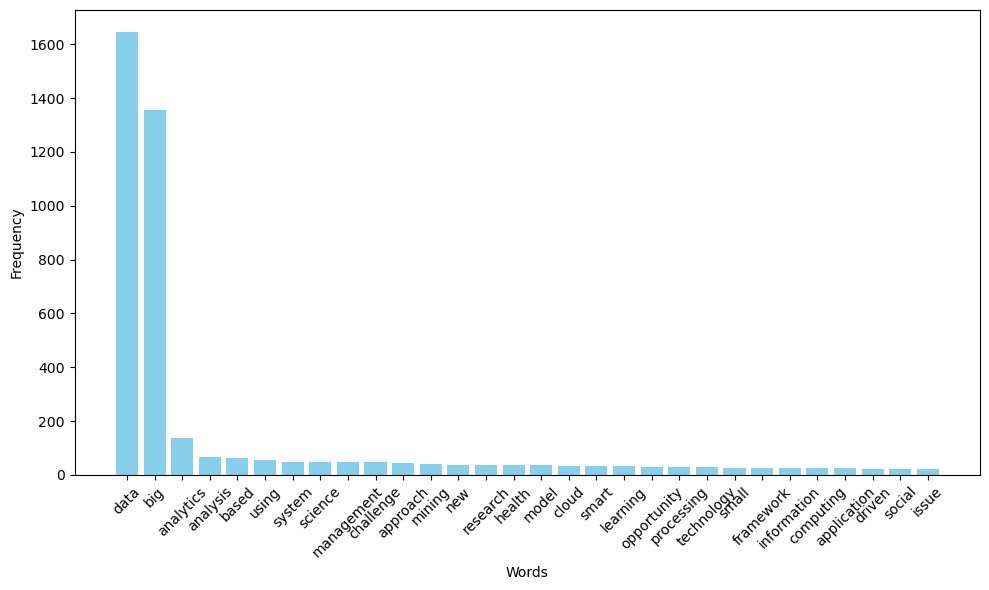

In [45]:
import numpy as np
word_counts = Counter(words2)
top_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:30])

# 상위 15개 단어의 빈도를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_word_counts.keys(), top_word_counts.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
year_counts = Counter(all_years)

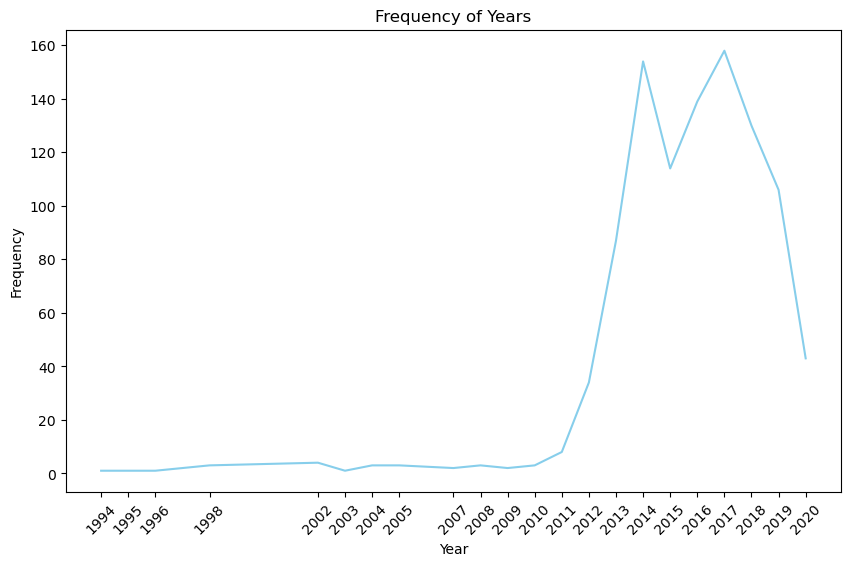

In [60]:
import matplotlib.pyplot as plt

data = {
    2015: 114, 2016: 139, 2018: 130, 2017: 158, 2014: 154, 2019: 106, 2020: 43, 2013: 87,
    2004: 3, 2012: 34, 2011: 8, 2009: 2, 2010: 3, 2008: 3, 2005: 3, 1998: 3, 1996: 1,
    2002: 4, 2007: 2, 2003: 1, 1994: 1, 1995: 1
}

# 연도를 기준으로 정렬
sorted_data = dict(sorted(data.items()))

# 딕셔너리를 키와 값으로 분리
years = list(sorted_data.keys())
counts = list(sorted_data.values())

# 데이터 플롯
plt.figure(figsize=(10, 6))
plt.plot(years, counts, linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Years')
plt.xticks(years, rotation=45)


plt.show()

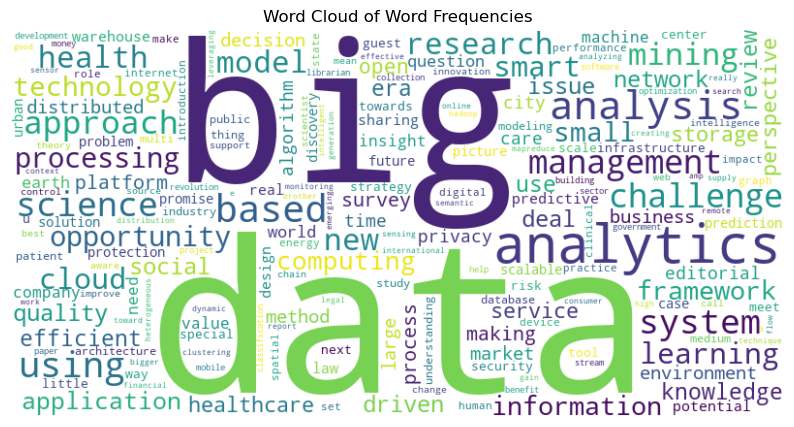

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words2))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word Frequencies')
plt.show()